In [3]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
df = pl.read_csv("Experiments/x_15k.csv")
print(df.head())

shape: (5, 7)
┌───────┬─────┬─────┬─────┬─────────────┬───────┬─────┐
│ frame ┆ id  ┆ x   ┆ y   ┆ image_index ┆ angle ┆ fox │
│ ---   ┆ --- ┆ --- ┆ --- ┆ ---         ┆ ---   ┆ --- │
│ i64   ┆ i64 ┆ i64 ┆ i64 ┆ i64         ┆ i64   ┆ i64 │
╞═══════╪═════╪═════╪═════╪═════════════╪═══════╪═════╡
│ 0     ┆ 0   ┆ 637 ┆ 574 ┆ 0           ┆ -131  ┆ 0   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ 0     ┆ 1   ┆ 371 ┆ 339 ┆ 0           ┆ -201  ┆ 0   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ 0     ┆ 2   ┆ 590 ┆ 69  ┆ 0           ┆ 55    ┆ 0   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ 0     ┆ 3   ┆ 628 ┆ 325 ┆ 0           ┆ -111  ┆ 0   │
├╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ 0     ┆ 4   ┆ 542 ┆ 169 ┆ 0           ┆ -8    ┆ 0   │
└───────┴─────┴─────┴─────┴─────────────┴───────┴─────┘


In [4]:
q = df.groupby("frame").agg(
                [
                        (pl.col("fox") == 1).sum().alias("fox"),
                        (pl.col("fox") == 0).sum().alias("rabbit")

                ]).sort("frame")


q = q.to_pandas()
peak_idxs_fox = find_peaks(q["fox"], width=50)[0]
peak_vals_fox = q["fox"].array[peak_idxs_fox]
val_idxs_fox = find_peaks(-q["fox"], width=50)[0]
val_vals_fox = q["fox"].array[val_idxs_fox]

peak_std_fox = peak_vals_fox.std()/peak_vals_fox.mean()
val_std_fox = val_vals_fox.std()/val_vals_fox.mean()

peak_idxs_rab = find_peaks(q["rabbit"], width=50)[0]
peak_vals_rab = q["rabbit"].array[peak_idxs_rab]
val_idxs_rab = find_peaks(-q["rabbit"], width=50)[0]
val_vals_rab = q["rabbit"].array[val_idxs_rab]

peak_std_rab = peak_vals_rab.std()/peak_vals_rab.mean()
val_std_rab = val_vals_rab.std()/val_vals_rab.mean()

score = max(peak_std_rab, val_std_rab) + max(peak_std_fox, val_std_fox)
print(score)
#print(peak_std_fox, val_std_fox, peak_std_rab, val_std_rab)

#print(score(q))
#q["fox_std"] = q["fox"].rolling_std(1000)
#q["rab_std"] = q["rabbit"].rolling_std(1000)

0.8926699458250832


NameError: name 'peak_idxs_fox' is not defined

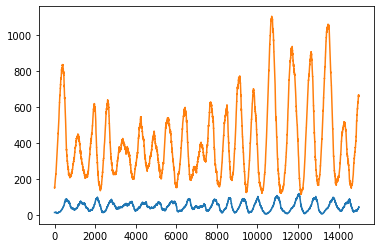

In [5]:
plt.plot(q["fox"].to_list())
plt.plot(q["rabbit"].to_list())
#plt.plot(q["fox_std"].to_list())
#plt.plot(q["rab_std"].to_list())
plt.plot(peak_idxs_fox, q["fox"].array[peak_idxs_fox])
plt.plot(val_idxs_fox, q["fox"].array[val_idxs_fox])
plt.plot(peak_idxs_rab, q["fox"].array[peak_idxs_rab])
plt.plot(val_idxs_rab, q["fox"].array[val_idxs_rab])
plt.legend(["foxes","rabbits", "fox_std", "rabbit_std"])
plt.ylabel("Number of Individuals")
plt.xlabel("Frames")
plt.yscale("log")